In [1]:
push!(LOAD_PATH, pwd())
using RungeKutta

using PyPlot
using LaTeXStrings: @L_str

In [2]:
include("IRK/implicite_euler.jl")

implicite_euler

## Пример №1. Для явного метода Эйлера
Хайрер, том 2 пример Кертисса и Хиршфельдера (1952 год)
$$
    \dot{x} = -50(x - \cos{t})
$$

In [3]:
function stiff1(t::Float64, x::Array{Float64,1})
    return [-50.0*(x[1] - cos(t))]
end

function stiff1(t::Float64, x::Float64)
    return -50.0*(x - cos(t))
end

function dstiff1(t::Float64, x::Float64)::Float64
    return -50.0
end

dstiff1 (generic function with 1 method)

In [4]:
x_0 = [0.0]
T=(0.0, 1.6)

h1 = 1.974/50.0
tn1, xn1 = RungeKutta.euler(stiff1, x_0, time_interval=T, h=h1)

h2 = 1.875/50.0
tn2, xn2 = RungeKutta.euler(stiff1, x_0, time_interval=T, h=h2)

T=(0.0, 1.6)
# tn, xn = RungeKutta.RK.RKp6n1(stiff1, x_0, 0.01, T[1], T[2])
h3 = 1.974/50.0
tn, xn = implicite_euler(stiff1, dstiff1, x_0[1], t_0=T[1], t_N=T[2], h=h3)

([0.0, 0.03948, 0.07896, 0.11844, 0.15792, 0.19740000000000002, 0.23688000000000003, 0.27636000000000005, 0.31584000000000007, 0.3553200000000001  …  1.2633599999999994, 1.3028399999999993, 1.3423199999999993, 1.3817999999999993, 1.4212799999999992, 1.4607599999999992, 1.5002399999999991, 1.539719999999999, 1.579199999999999, 1.6], [0.0, 0.6632353033380504, 0.8846956520158631, 0.9565790722636723, 0.9771404375832549, 0.9794233263107939, 0.9745457753129374, 0.9662549942592212, 0.9558213378801697, 0.9436838756437779  …  0.3214106201347094, 0.28380945670992175, 0.2457659853412226, 0.20733949555967776, 0.16858987381827606, 0.12957751016081118, 0.0903632041059337, 0.051008069893049575, 0.011573441237736312, -0.027879224254887394])

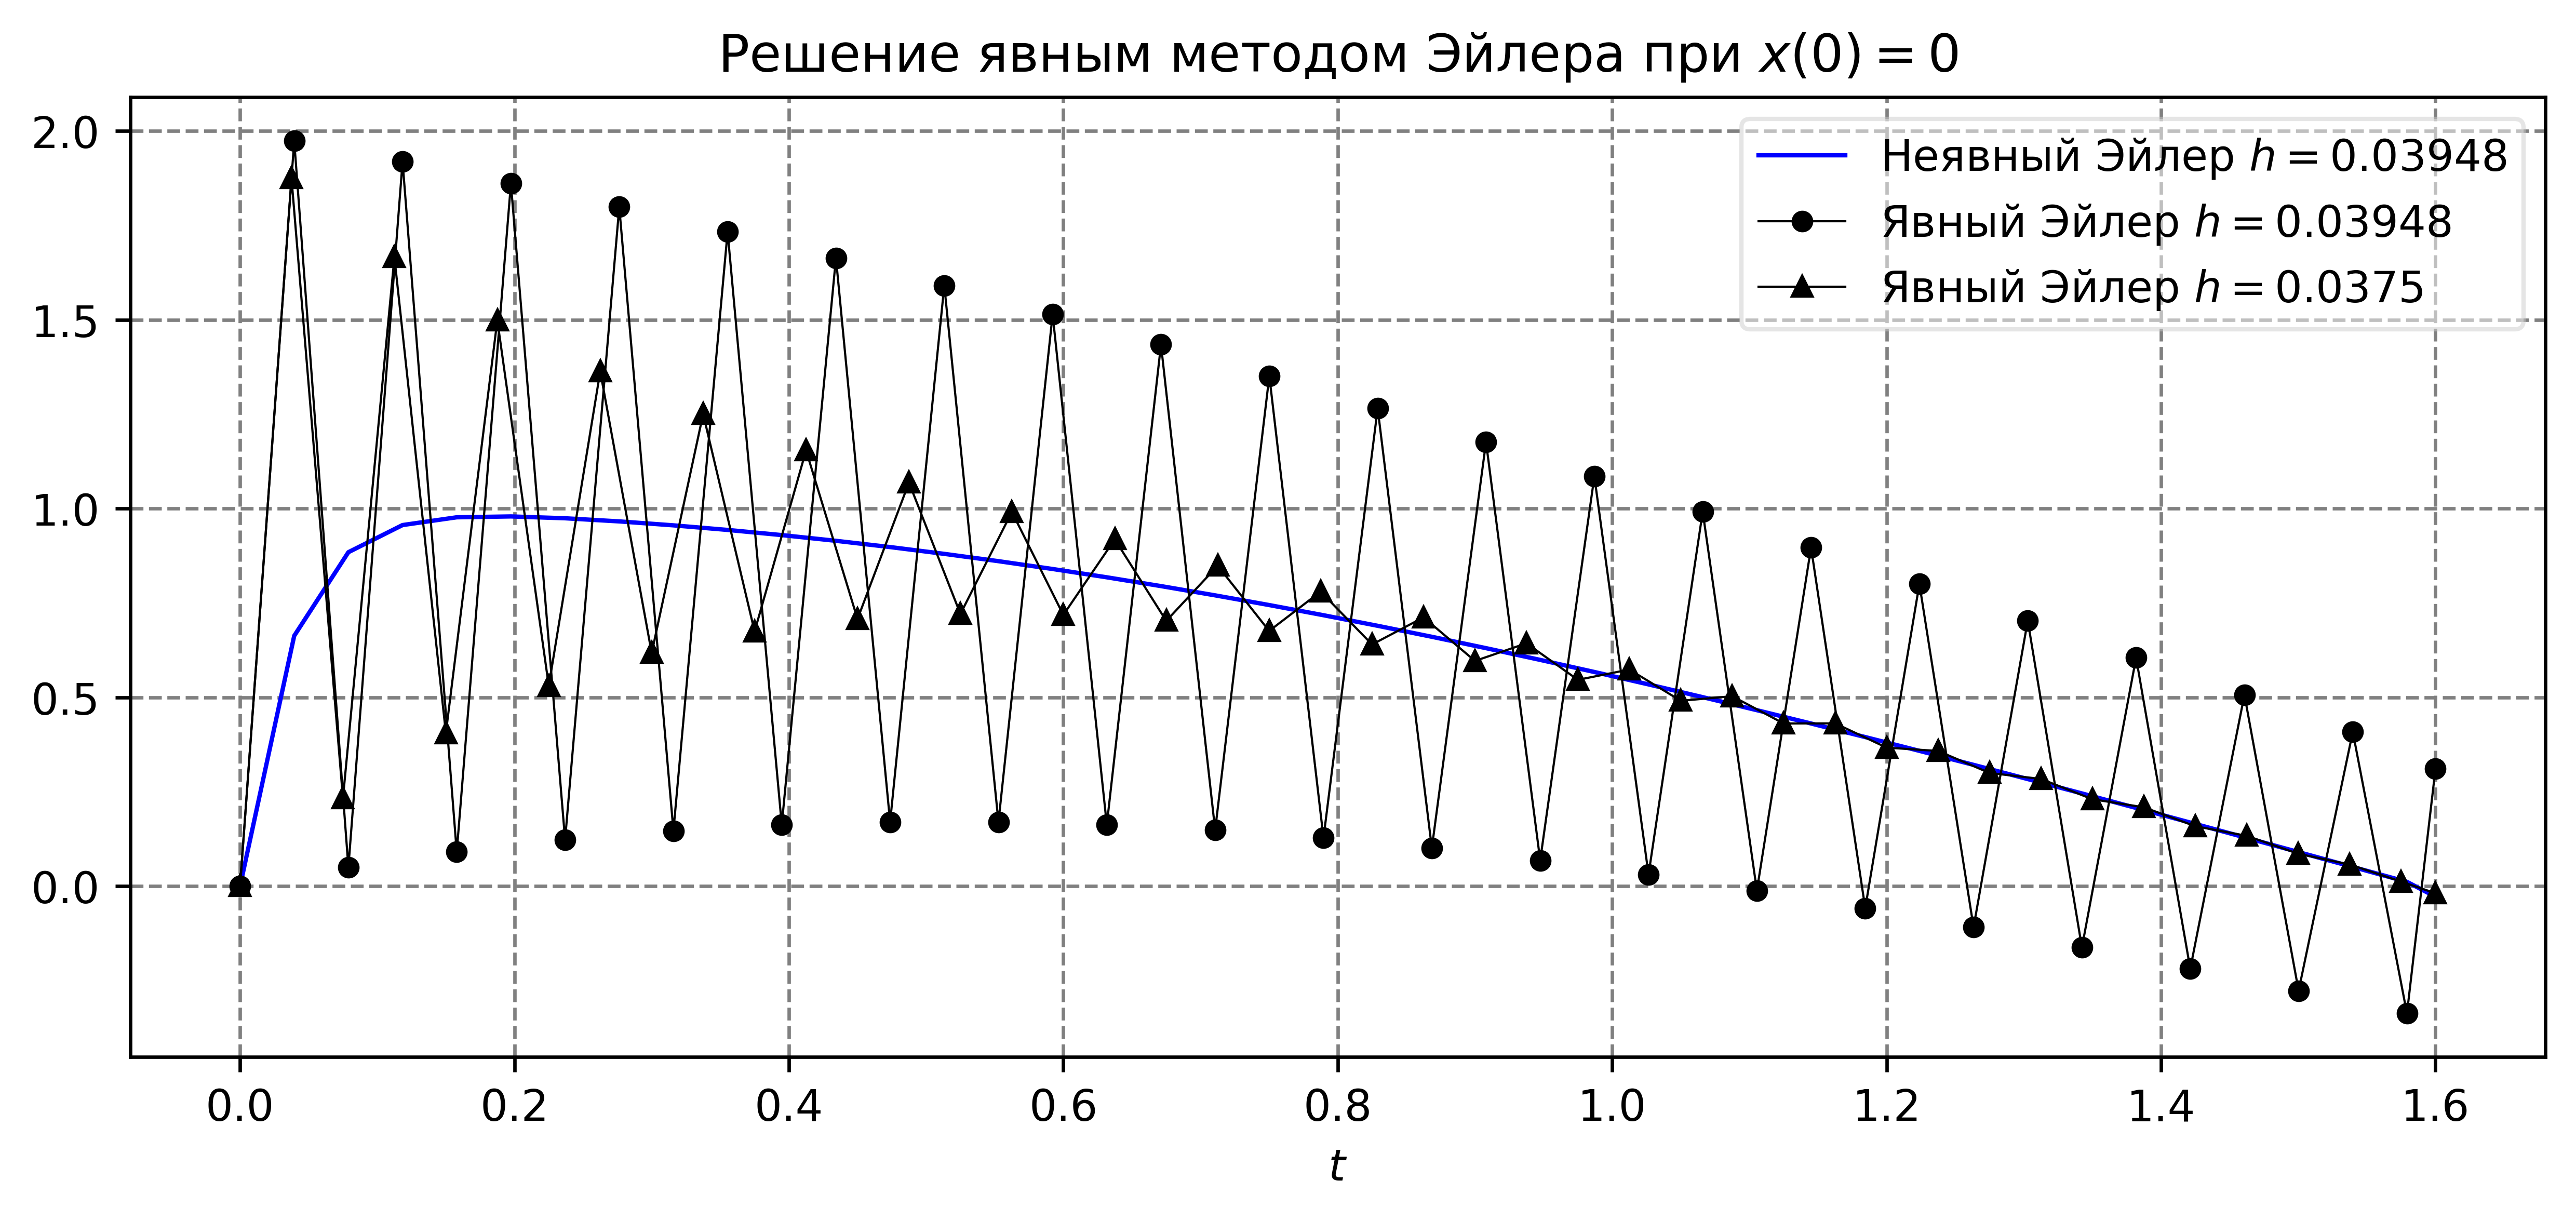

PyObject Text(0.5, 141.0, '$t$')

In [5]:
fig1 = PyPlot.figure(num=1, dpi=600, figsize=(10, 4))
ax1 = fig1.add_subplot(1, 1, 1)
ax1.grid(b=true, color="gray", linestyle="--")

ax1.plot(tn, xn[:,1], color="blue", linewidth=1.0, label=L"Неявный Эйлер $h = "*"$(h3)"*L"$")
ax1.plot(tn1, xn1[:,1], marker="o", markersize=4, color="black", linewidth=0.5, label=L"Явный Эйлер $h = "*"$(h1)"*L"$")
ax1.plot(tn2, xn2[:,1], marker="^", markersize=4, color="black", linewidth=0.5, label=L"Явный Эйлер $h = "*"$(h2)"*L"$")

ax1.legend(loc=1, framealpha=0.5)
ax1.set_title(L"Решение явным методом Эйлера при $x(0) = 0$")
ax1.set_xlabel(L"$t$")
#ax1[:set_ylabel](L"$x(t)$")

## Пример №2. Для вложенного метода Рунге-Кутты

Пример Робетсона (1966 год)
\begin{equation}
    \left\{
    \begin{aligned}
        &\dot{x}_1 = -0.04 x_1 + 10^4 x_2 x_3,\\
        &\dot{x}_2 = +0.04 x_1 - 10^4 x_2 x_3 - 3\cdot 10^7 x^2_2,\\
        &\dot{x}_3 =  +3\cdot 10^7 x^2_2,\\
        & x_1(0) = 1,\; x_2(0) = x_3(0) = 0.
    \end{aligned}
    \right.
\end{equation}

In [6]:
"""Пример Робетсона (1966 год)"""
function stiff2(t::Float64, x::Vector{Float64})
    return [-0.04*x[1] + 1.0e4 * x[2] * x[3], 0.04*x[1] - 1.0e4 * x[2] * x[3] - 3.0e7 * x[2]^2, 3.0e7*x[2]^2]
end

stiff2

In [7]:
# Начальные данные из книги Хайрера 2-й том
x_0 = [1.0, 0.0, 0.0]
T = [0.0, 0.3]
R_tol = 1.0e-2
A_tol = 1.0e-6*R_tol
method = "DOPRI5"

"DOPRI5"

In [8]:
(accepted_t, accepted_h, rejected_t, rejected_h, errors) = RungeKutta.ERK.DOPRI5_info(stiff2, A_tol, R_tol, x_0, 
T[1], T[2])
tn, xn = RungeKutta.ERK.DOPRI5(stiff2, A_tol, R_tol, x_0, T[1], T[2])

println("Всего шагов: ", length(accepted_t))
println("Шагов отброшенно: ", length(rejected_h))

Всего шагов: 208
Шагов отброшенно: 0


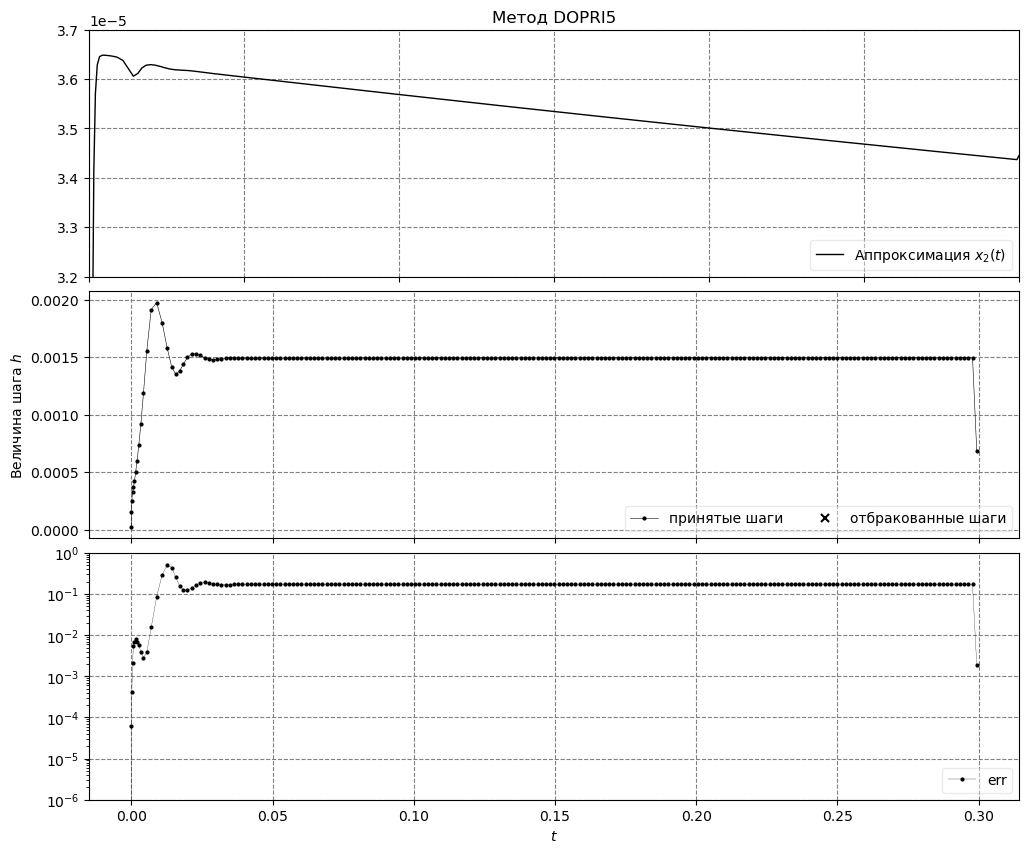

PyObject <matplotlib.legend.Legend object at 0x7f5039034f90>

In [9]:
fig2 = PyPlot.figure(num=2, figsize=(12.0, 10.0))
fig2.subplots_adjust(hspace = .06)

ax21 = fig2.add_subplot(3, 1, 1, xmargin=0.0)
ax22 = fig2.add_subplot(3, 1, 2)
ax23 = fig2.add_subplot(3, 1, 3)

ax21.grid(b=true, color="gray", linestyle="--")
ax22.grid(b=true, color="gray", linestyle="--")
ax23.grid(b=true, color="gray", linestyle="--")

ax21.set_xticklabels([])
ax22.set_xticklabels([])

#ax21.set_yscale("log")
#ax22.set_yscale("log")
ax23.set_yscale("log")

ax21.set_title("Метод $method")

ax22.set_ylabel(L"Величина шага $h$")
ax23.set_xlabel(L"$t$")

# Обрезаем масштаб, чтобы было также, как у Хайрера
ax21.set_ylim([0.000032, 0.000037])
#ax22.set_ylim([1.0e-3, 2.0e-3])
ax23.set_ylim([1.0e-6, 1.0])

# Численное решение
ax21.plot(tn, xn[:,2], lw=1.0, color="k", label=L"Аппроксимация $x_{2}(t)$")


# Величины принятых и отброшенных шагов
ax22.plot(accepted_t, accepted_h, lw=0.4, color="k", marker="o", markersize=2, label="принятые шаги")
ax22.plot(rejected_t, rejected_h, linestyle="None", marker="x", markeredgecolor="black", markeredgewidth=1.5, 
markersize=6, label="отбракованные шаги")
# Величины погрешностей `err`
ax23.plot(accepted_t, errors, lw=0.2, ls="-", marker="o", markersize=2, color="k", label="err")

ax21.legend(ncol=4, loc=4, framealpha=0.4)
ax22.legend(ncol=2, loc=4, framealpha=0.4)
ax23.legend(ncol=2, loc=4, framealpha=0.4)

## Пример №3

\begin{equation}
    \left\{
    \begin{aligned}
        &\dot{x}_1 = -2000(+x_1\cos{t} + x_2\sin{t} + 1),\\
        &\dot{x}_2 = -2000(-x_1\sin{t} + x_2\cos{t} + 1),\\
        & x_1(0) = 1,\; x_2(0) = 0.
    \end{aligned}
    \right.
\end{equation}

In [10]:
"""Хайрер, том2 стр 35"""
function stiff3(t::Float64, x::Vector{Float64})
    return [-2000.0*(x[1] * cos(t) + x[2] * sin(t) + 1.0), -2000.0*(-x[1] * sin(t) + x[2] * cos(t) + 1.0)]
end

stiff3

In [11]:
# Начальные данные
x_0 = [1.0, 0.0]
T = [0.0, 1.57]
R_tol = 1.0e-5
A_tol = 1.0e-6*R_tol

method1 = "DOPRI5"
method2 = "Fehlberg7(8)A"

"Fehlberg7(8)A"

In [12]:
(accepted_t1, accepted_h1, rejected_t1, rejected_h1, errors1) = RungeKutta.ERK.DOPRI5_info(stiff3, A_tol, R_tol, x_0, 
T[1], T[2])

println("Метод $method1")
println("Всего шагов: ", length(accepted_t1))
println("Шагов отброшенно: ", length(rejected_h1))

Метод DOPRI5
Всего шагов: 1024
Шагов отброшенно: 5


In [13]:
(accepted_t2, accepted_h2, rejected_t2, rejected_h2, errors2) = RungeKutta.ERK.Fehlberg78A_info(stiff3, A_tol, R_tol, x_0, 
T[1], T[2])

println("Метод $method2")
println("Всего шагов: ", length(accepted_t2))
println("Шагов отброшенно: ", length(rejected_h2))

Метод Fehlberg7(8)A
Всего шагов: 12076
Шагов отброшенно: 2


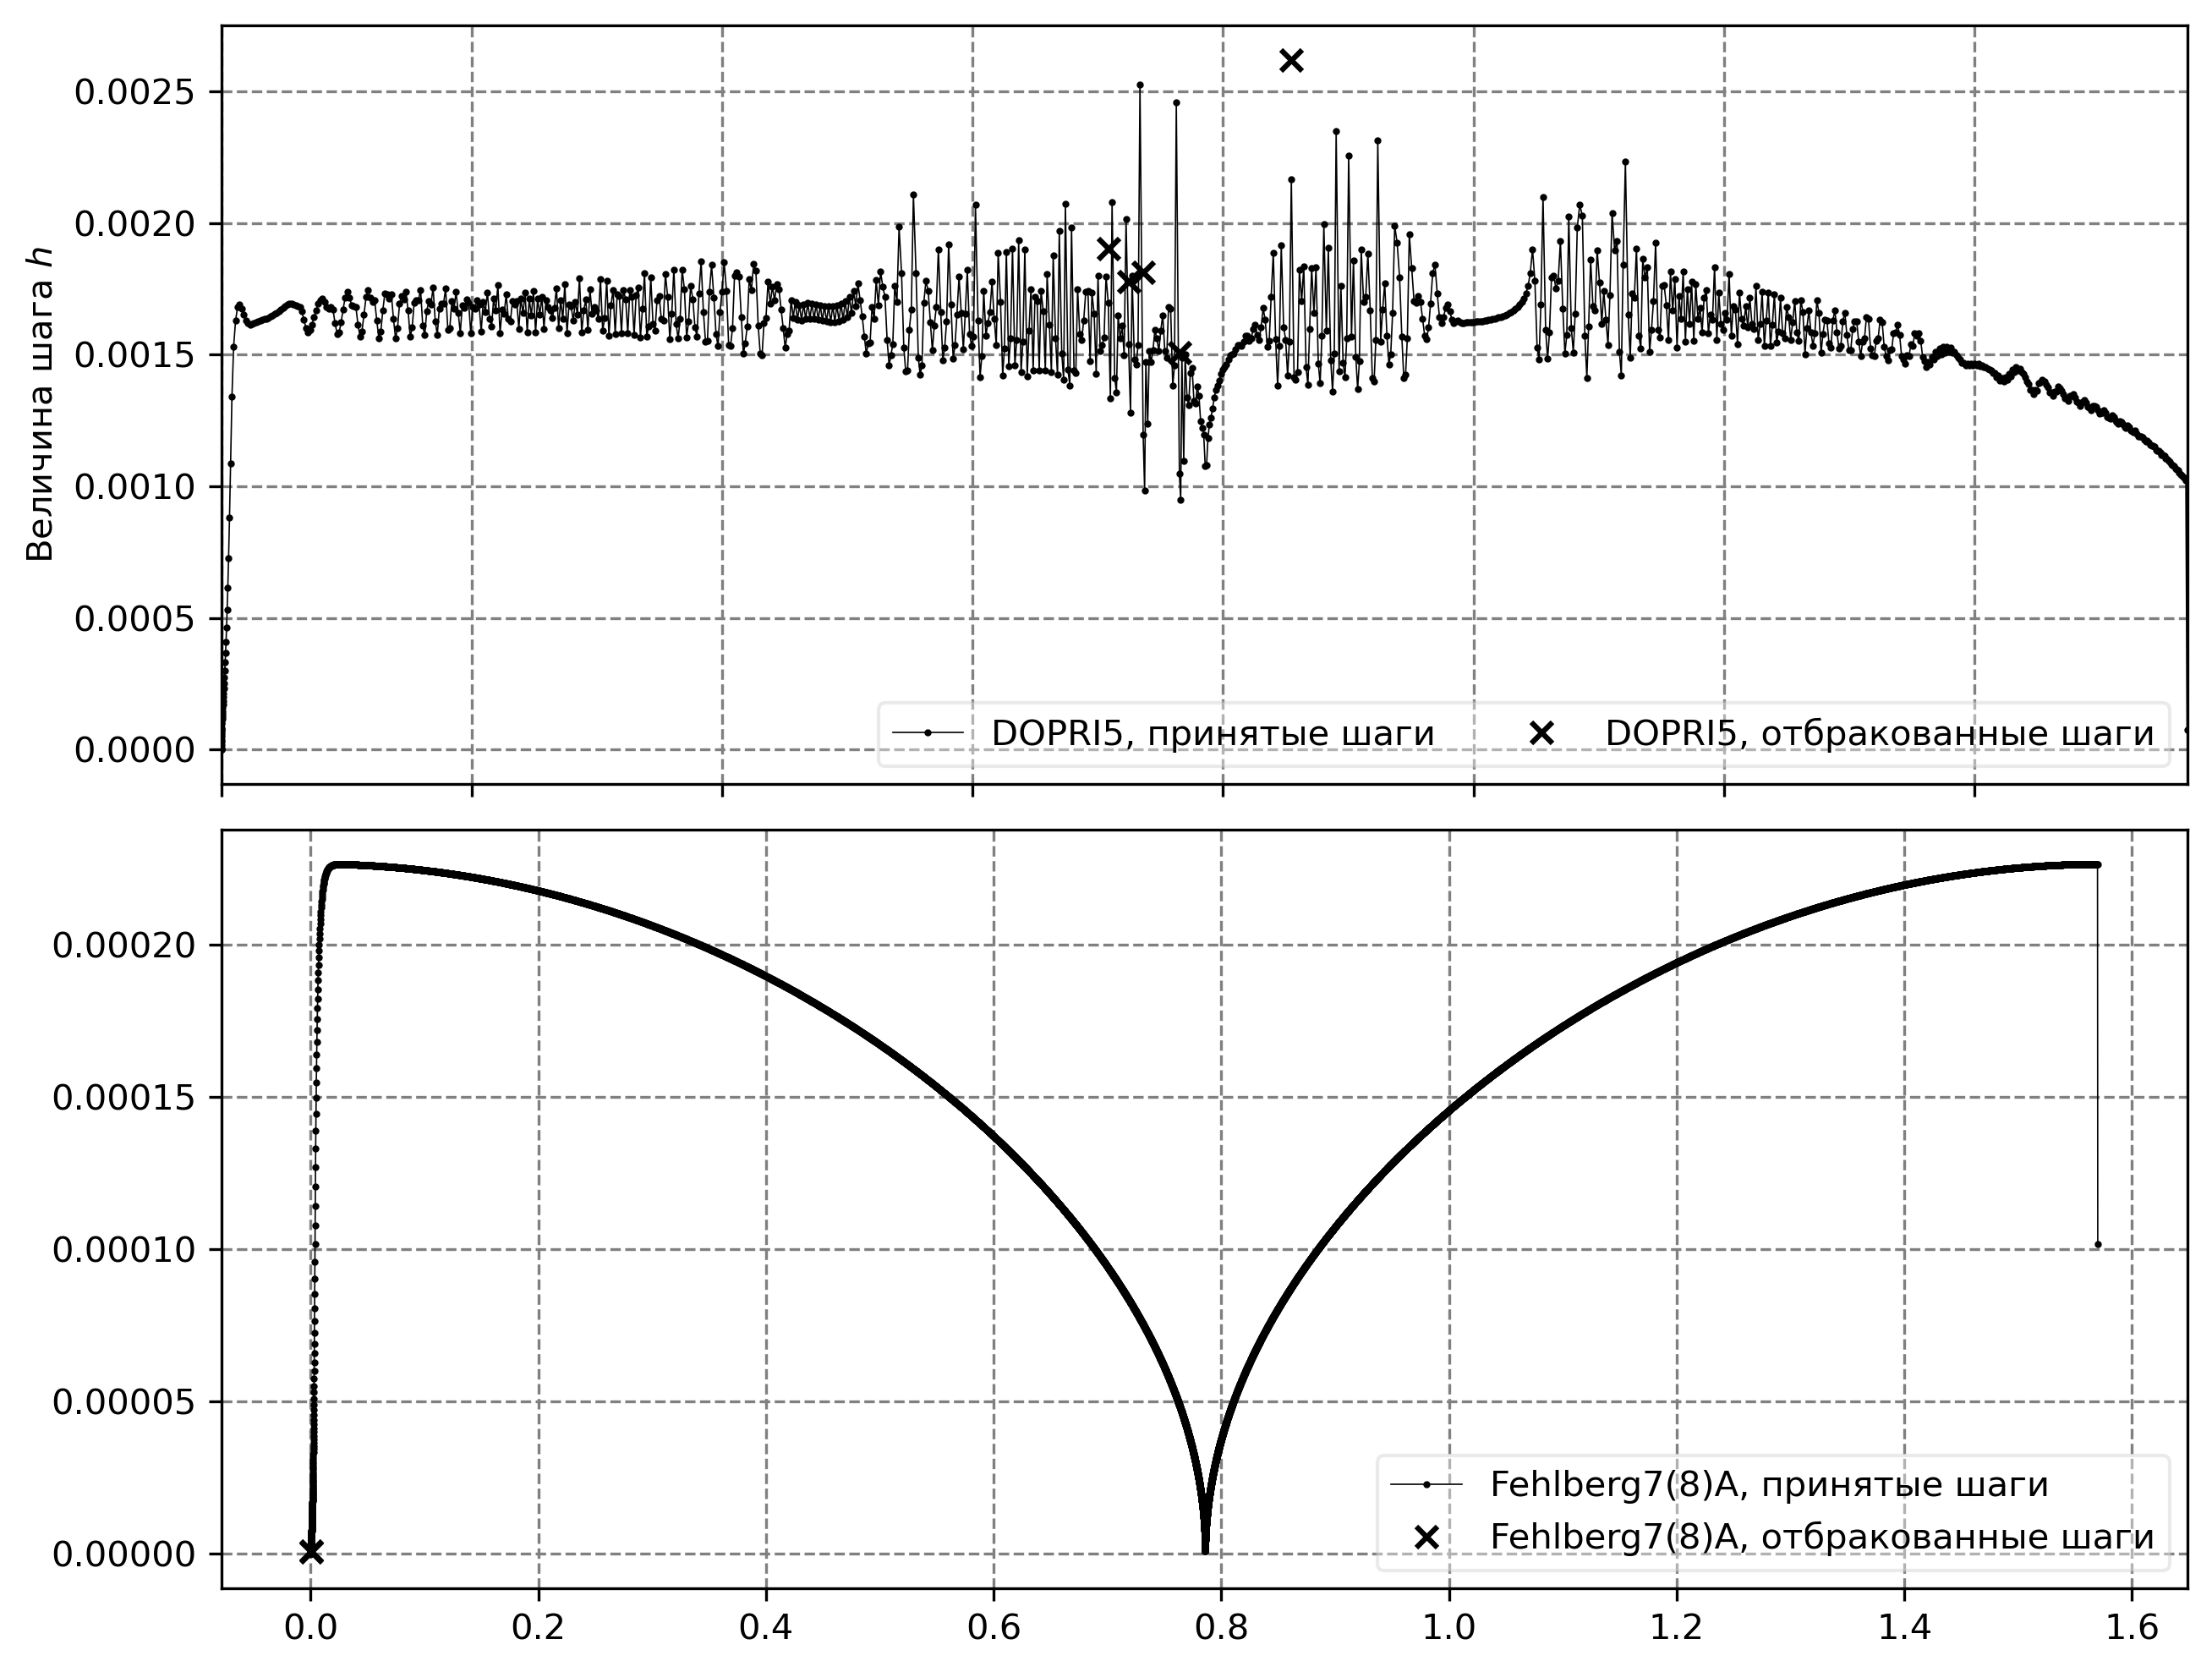

PyObject <matplotlib.legend.Legend object at 0x7f5038b61850>

In [14]:
fig3 = PyPlot.figure(num=3, dpi=300, figsize=(10.0, 8.0))
fig3.subplots_adjust(hspace = .06)

ax31 = fig3.add_subplot(2, 1, 1, xmargin=0.0)
ax32 = fig3.add_subplot(2, 1, 2)

ax31.grid(b=true, color="gray", linestyle="--")
ax32.grid(b=true, color="gray", linestyle="--")

ax31.set_xticklabels([])

#ax31.set_yscale("log")
#ax32.set_yscale("log")

ax31.set_ylabel(L"Величина шага $h$")
ax31.set_ylabel(L"Величина шага $h$")

# Обрезаем масштаб, чтобы было также, как у Хайрера
#ax31.set_ylim([0.000, 0.0035])
#ax32.set_ylim([0.000, 0.0035])

# Величины принятых и отброшенных шагов
ax31.plot(accepted_t1, accepted_h1, lw=0.4, color="k", marker="o", markersize=1, label="$method1, принятые шаги")
ax31.plot(rejected_t1, rejected_h1, linestyle="None", marker="x", markeredgecolor="black", markeredgewidth=1.5, 
markersize=6, label="$method1, отбракованные шаги")

ax32.plot(accepted_t2, accepted_h2, lw=0.4, color="k", marker="o", markersize=1, label="$method2, принятые шаги")
ax32.plot(rejected_t2, rejected_h2, linestyle="None", marker="x", markeredgecolor="black", markeredgewidth=1.5, 
markersize=6, label="$method2, отбракованные шаги")

ax31.legend(ncol=2, loc=4, framealpha=0.4)
ax32.legend(ncol=1, loc=4, framealpha=0.4)